

# About dataset

## Context

*The* 'tomatao Crop Water Quality Parameters Dataset' includes essential water quality metrics crucial for optimal potato growth. This comprehensive dataset covers parameters such as pH, solids,organic carbon, sulfate,hardness,chloromines,trihalomethanes,and turbidity offering valuable insights into the specific water quality requirements necessary to cultivate healthy and high-yielding potato crops. Researchers and farmers can use this data to make informed decisions regarding irrigation and soil management, ensuring the successful growth of potato plants while optimizing resource utilization and crop productivity.

## Content

###### The water_quality_.csv contains crop water quality metrics for 3276 different water bodies.

### 1.pH value :

pH is a measure of the acidity or alkalinity of water. It is expressed on a scale from 0 to 14, with 7 being neutral. Values below 7 indicate acidity, while values above 7 indicate alkalinity. pH can impact the chemical behavior of substances in water and is crucial for aquatic ecosystems and the effectiveness of water treatment processes.


### 2.Hardness

Water hardness is a measure of the concentration of dissolved minerals, primarily calcium and magnesium ions, in water. Hard water can have an impact on the taste of water, can lead to scaling in pipes and appliances, and may require water softening treatments in some cases.

### 3. Solids

Typically refers to measuring the concentration of suspended solids in the water, which can impact water quality and its suitability for irrigation.

### 4.Chloromines

Chloramines are chemical compounds formed by the combination of chlorine and ammonia. They are commonly used as disinfectants in drinking water treatment to kill or deactivate harmful microorganisms. Monitoring chloramine levels is important to ensure water safety.

### 5.Sulfate

When monitoring water quality for various purposes, including agricultural irrigation or environmental assessment, sulfate (SO4²-) is an important parameter to consider. Sulfate levels can impact both water quality and its suitability for specific uses.

### 6.Organic_Carbon

Organic carbon refers to the presence of carbon-containing compounds in water, which can come from natural sources (e.g., decaying organic matter) or anthropogenic sources (e.g., pollution). It is important in water quality assessment because organic carbon can serve as a food source for microorganisms and influence water treatment processes.

### 7.Trihalomethanes

THMs are a group of chemical compounds that form as byproducts when chlorine or chloramines are used to disinfect water containing organic matter. They are considered potentially harmful, and monitoring their levels is important for public health, as high THM concentrations can be associated with long-term health risks.

### 8.Turbidity

Turbidity is a measure of the cloudiness or haziness of water caused by the presence of suspended particles (e.g., silt, clay, microorganisms). High turbidity can affect the aesthetic quality of water and also serve as an indicator of water quality issues, as it can be associated with microbial contamination.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

## Data Collection

In [ ]:
wqcrop_dataset=pd.read_csv('/content/water_quality_ (3).csv')
wqcrop_dataset.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [ ]:
#number of rows and columns in dataset
wqcrop_dataset.shape

(3276, 9)

### Data Quality Assessment

In [ ]:
wqcrop_dataset['Check']=wqcrop_dataset['Check'].astype('category')

In [ ]:
#create approve limit for each features based on data available in Google search
cols=wqcrop_dataset.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [ ]:
wqcrop_dataset.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [ ]:
#Portability is 1 - means good for Human
wqcrop_dataset[wqcrop_dataset['Check']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1278.000000,7.073783,1.343952,0.227499,6.351824,7.073783,7.780068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985038,21199.386615,27973.236447,56488.672410
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,1278.000000,332.566990,41.865385,129.000000,313.052947,332.566990,354.807924,481.030642
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1278.000000,66.539684,15.971941,8.175876,56.911186,66.539684,77.067457,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [ ]:
# Portability is 0 - means not good for Human
wqcrop_dataset[wqcrop_dataset['Check']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249013,61227.196010
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


In [ ]:
wqcrop_dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

In [ ]:
wqcrop_dataset[wqcrop_dataset['Sulfate'].isnull()]
wqcrop_dataset[wqcrop_dataset['ph'].isnull()]
wqcrop_dataset[wqcrop_dataset['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check


In [ ]:
#Replace null values based on the group/sample mean
wqcrop_dataset['ph']=wqcrop_dataset['ph'].fillna(wqcrop_dataset.groupby(['Check'])['ph'].transform('mean'))
wqcrop_dataset['Sulfate']=wqcrop_dataset['Sulfate'].fillna(wqcrop_dataset.groupby(['Check'])['Sulfate'].transform('mean'))
wqcrop_dataset['Trihalomethanes']=wqcrop_dataset['Trihalomethanes'].fillna(wqcrop_dataset.groupby(['Check'])['Trihalomethanes'].transform('mean'))

In [ ]:
print(wqcrop_dataset)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.085378  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  334.564290   
2     8.099124  224.236259  19909.54173     9.275884  334.564290   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  332.566990   
3273  9.419510  175.762646  33155.57822     7.350233  332.566990   
3274  5.126763  230.603758  11983.86938     6.303357  332.566990   
3275  7.874671  195.102299  17404.17706     7.509306  332.566990   

      Organic_carbon  Trihalomethanes  Turbidity Check  
0          10.379783        86.990970   2.963135     0  
1          15.180013        56.329076   4.500656     0  
2          1

In [ ]:
wqcrop_dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

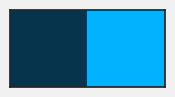

In [ ]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

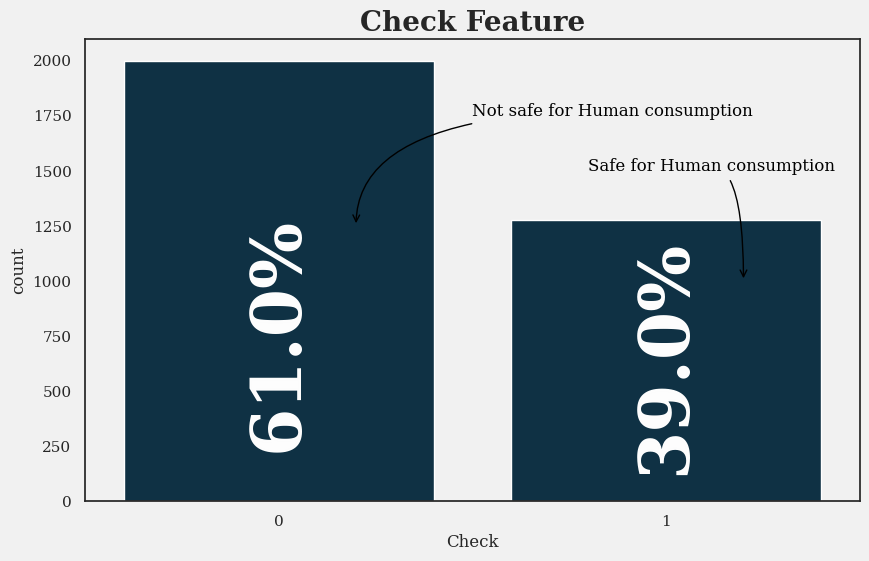

In [ ]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=wqcrop_dataset, x='Check')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(wqcrop_dataset)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Check Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

In [ ]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


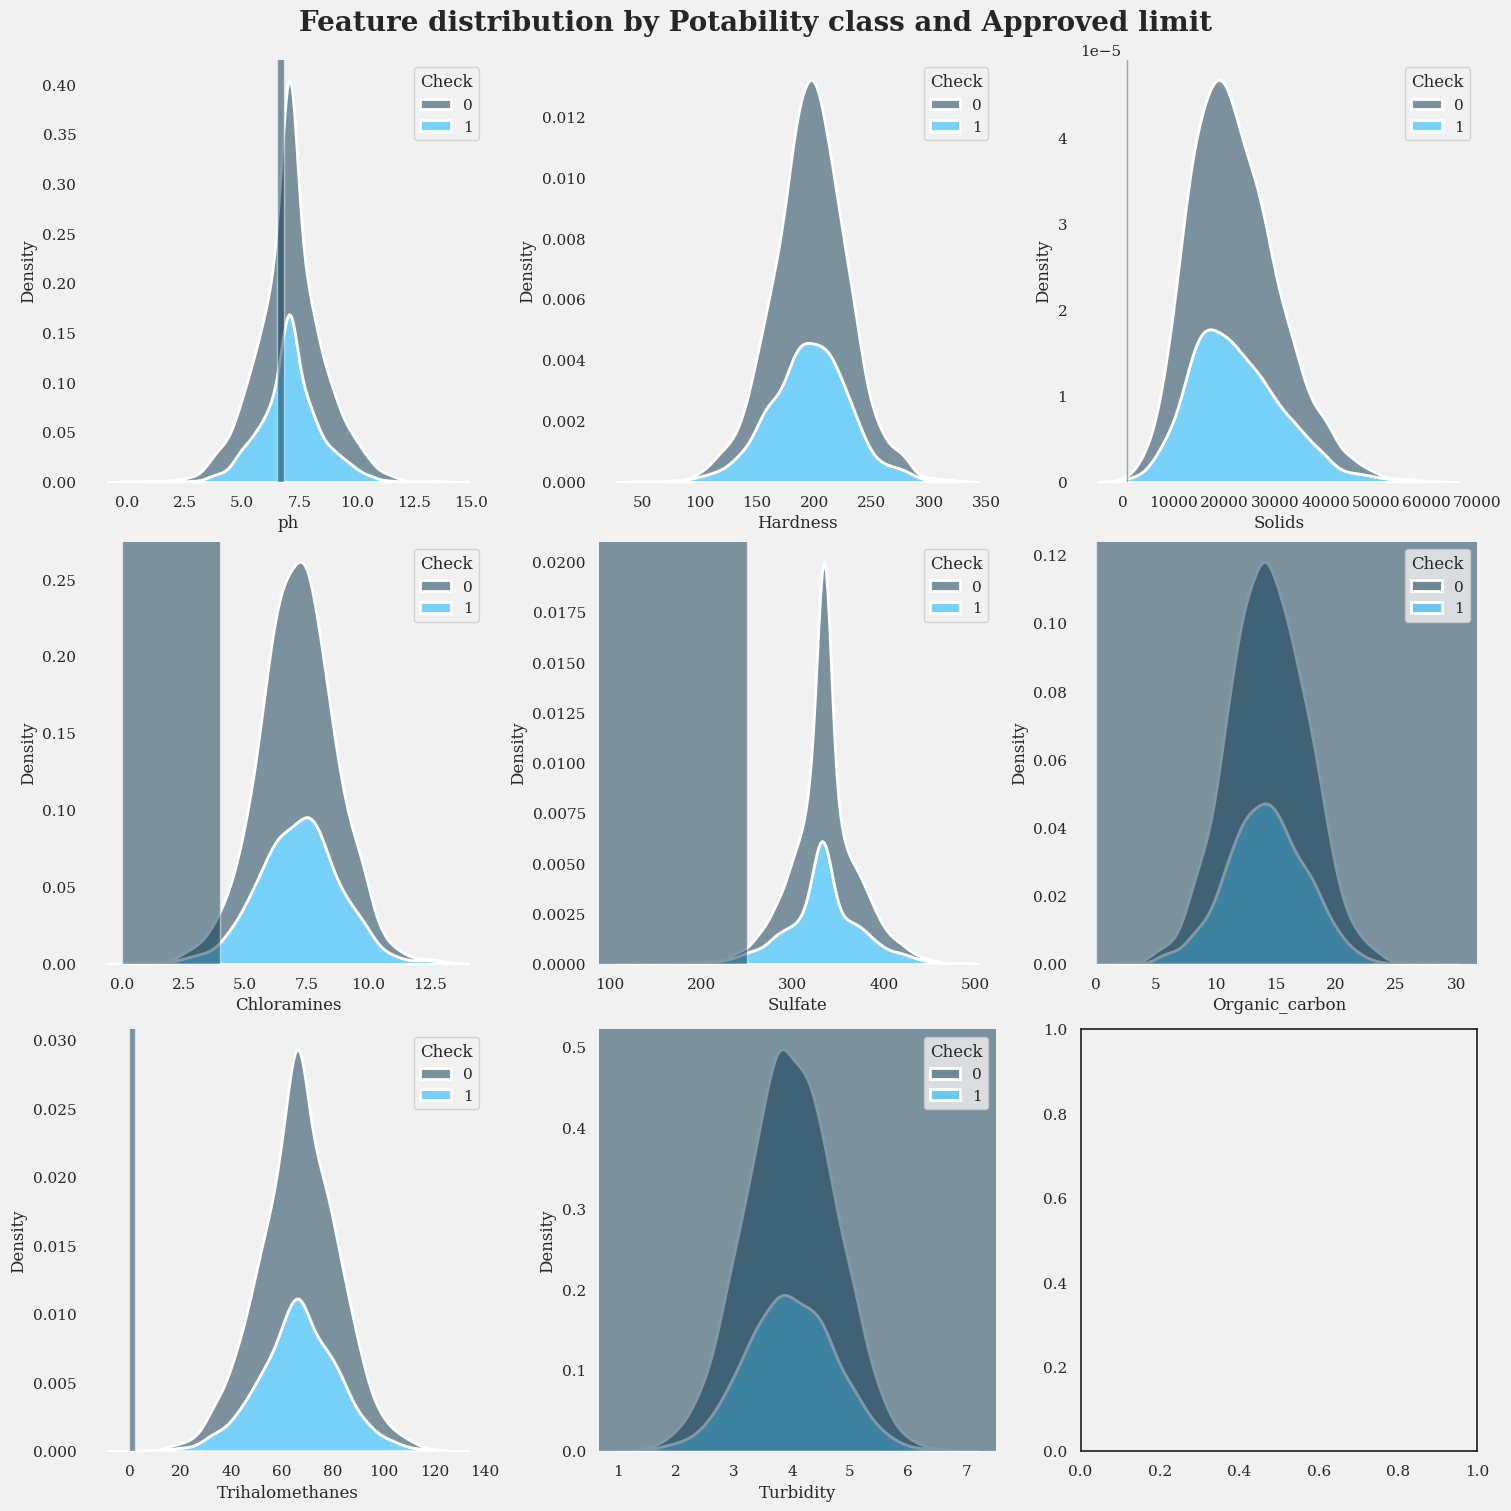

In [ ]:
from matplotlib.patches import Rectangle
int_cols = wqcrop_dataset.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=wqcrop_dataset, x=i, hue='Check', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

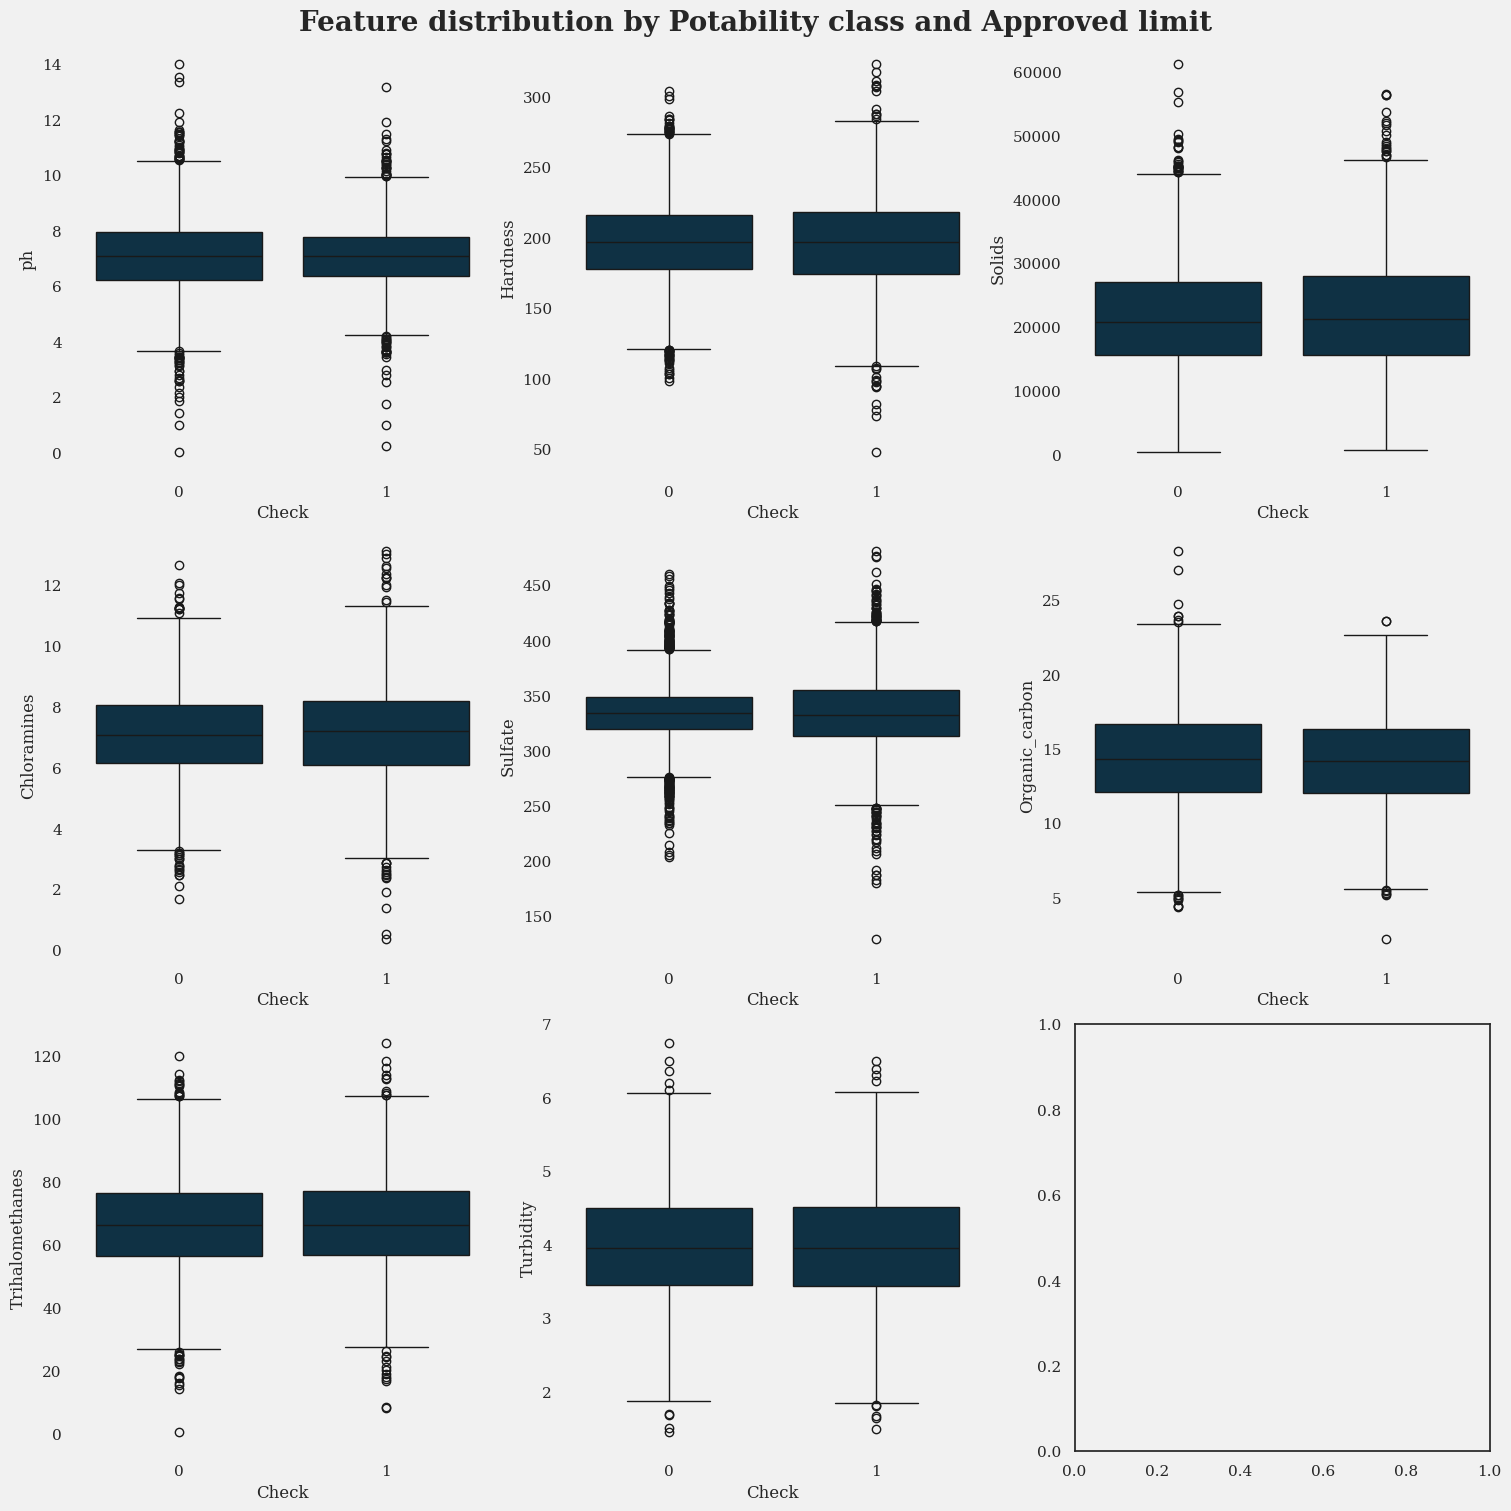

In [ ]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=wqcrop_dataset, y=i, x='Check', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

<Axes: >

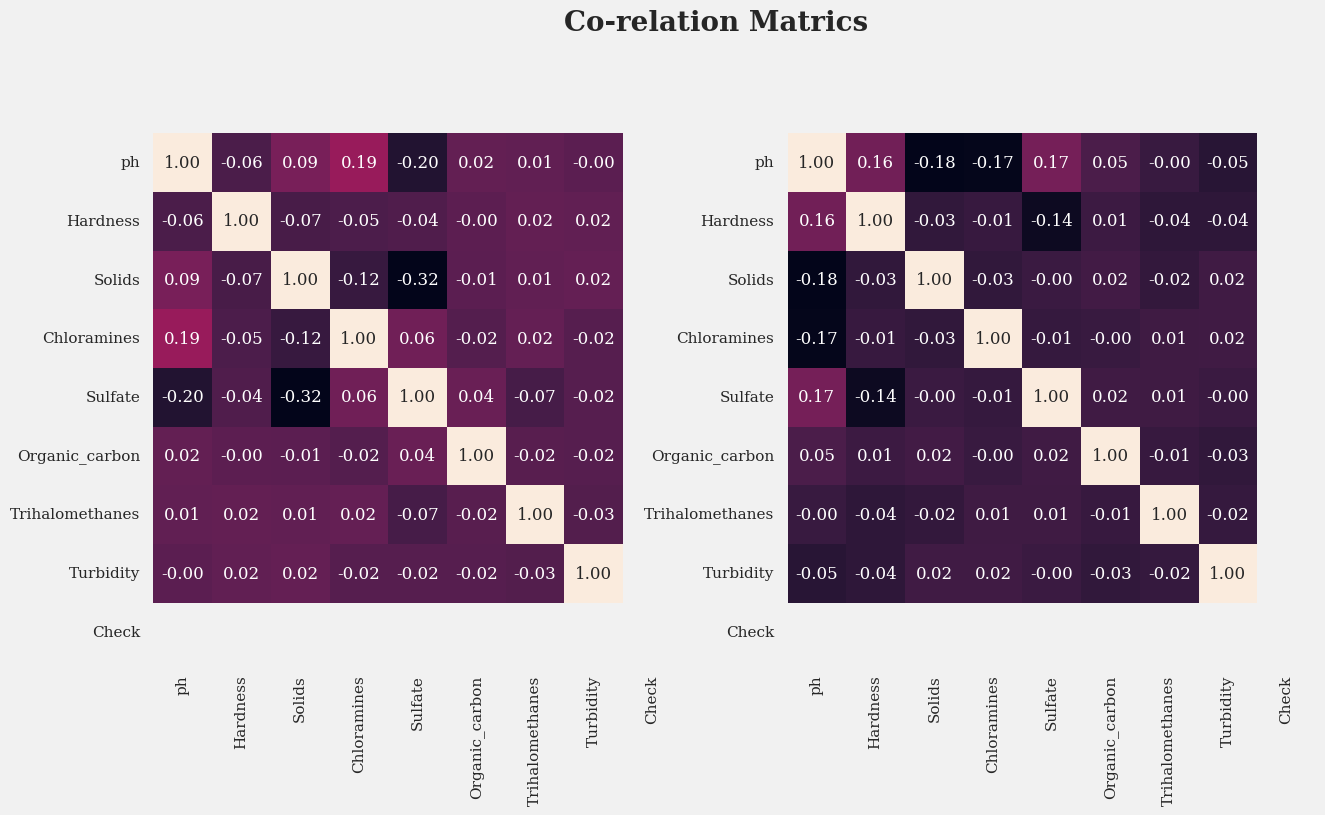

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(wqcrop_dataset[wqcrop_dataset['Check']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(wqcrop_dataset[wqcrop_dataset['Check']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<Axes: >

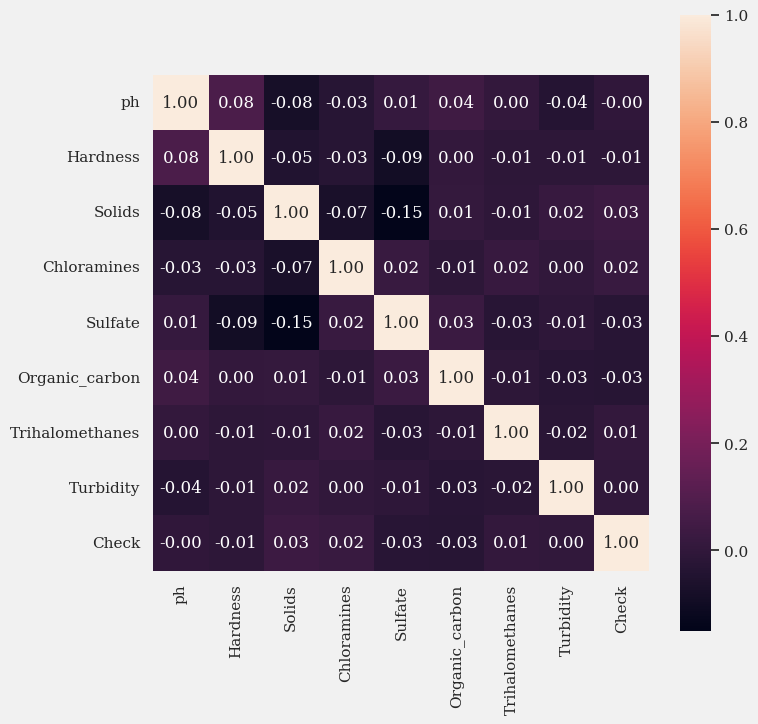

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(wqcrop_dataset.corr(), annot=True, fmt='0.2f', square=True)

<Axes: >

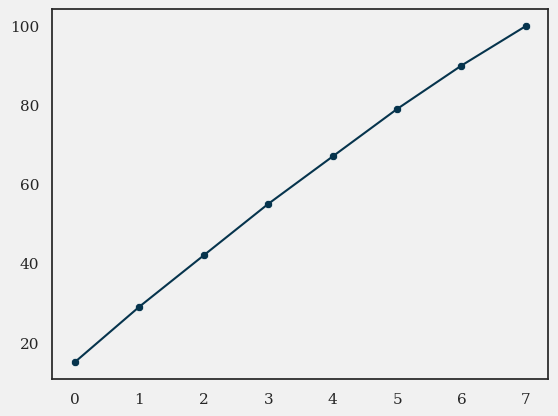

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = wqcrop_dataset.drop(['Check'], axis=1)
y=wqcrop_dataset['Check']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

In [ ]:
#handling imbalance in data and Scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=wqcrop_dataset.drop(['Check'], axis=1)
y=wqcrop_dataset['Check']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(),XGBClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.586694
5,KNeighborsClassifier(),0.646843
0,AdaBoostClassifier(),0.698581
3,DecisionTreeClassifier(),0.716048
1,BaggingClassifier(),0.747646
2,GradientBoostingClassifier(),0.758398
6,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=None, ...)",0.786960


In [ ]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 600} , Best Score : 0.7607551745530426
Best Estimator: {'n_estimators': 80} , Best Score : 0.7775489256105126


0	ExtraTreesClassifier:	0.6996951219512195
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.71      0.32      0.45       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.62       656
weighted avg       0.70      0.70      0.66       656



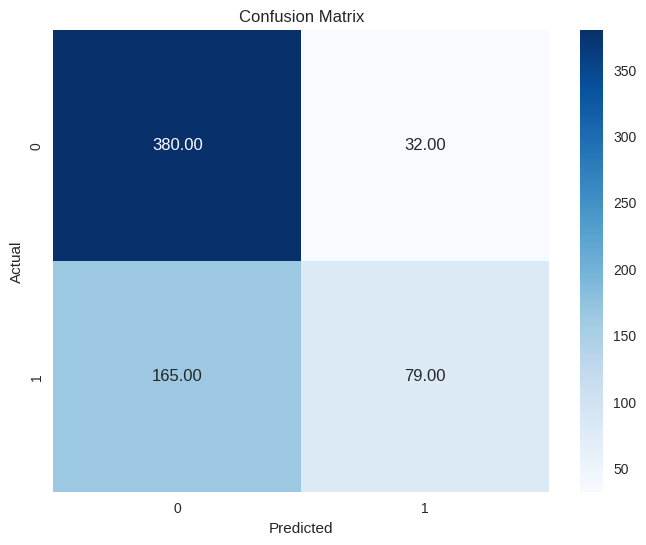

Accuracy: 0.6996951219512195
----------------------------------------------------
1	KNeighborsClassifier:	0.5396341463414634
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       412
           1       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.54      0.52       656



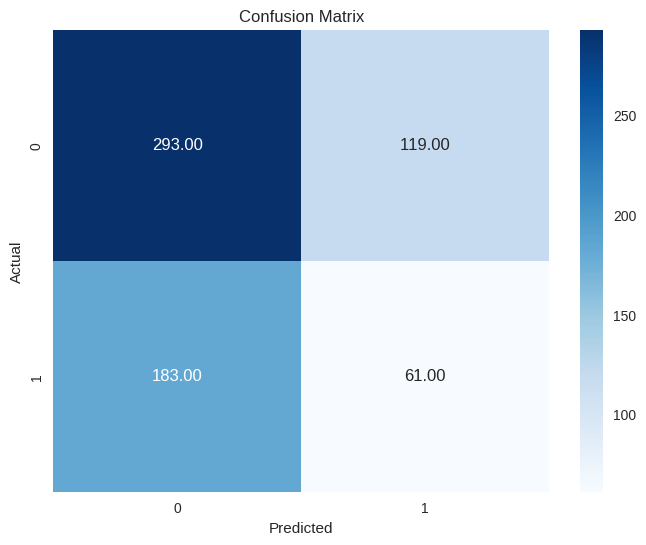

Accuracy: 0.5396341463414634
----------------------------------------------------
2	AdaBoostClassifier:	0.7545731707317073
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       412
           1       0.78      0.47      0.59       244

    accuracy                           0.75       656
   macro avg       0.76      0.70      0.71       656
weighted avg       0.76      0.75      0.74       656



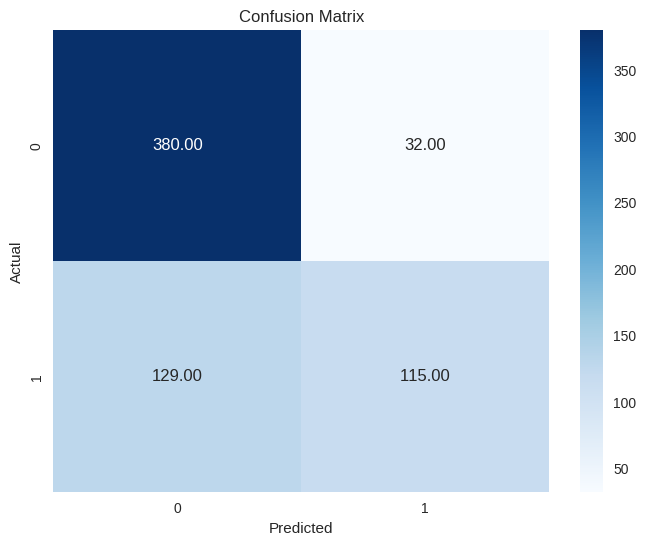

Accuracy: 0.7545731707317073
----------------------------------------------------
3	DecisionTreeClassifier:	0.7423780487804879
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       412
           1       0.66      0.64      0.65       244

    accuracy                           0.74       656
   macro avg       0.72      0.72      0.72       656
weighted avg       0.74      0.74      0.74       656



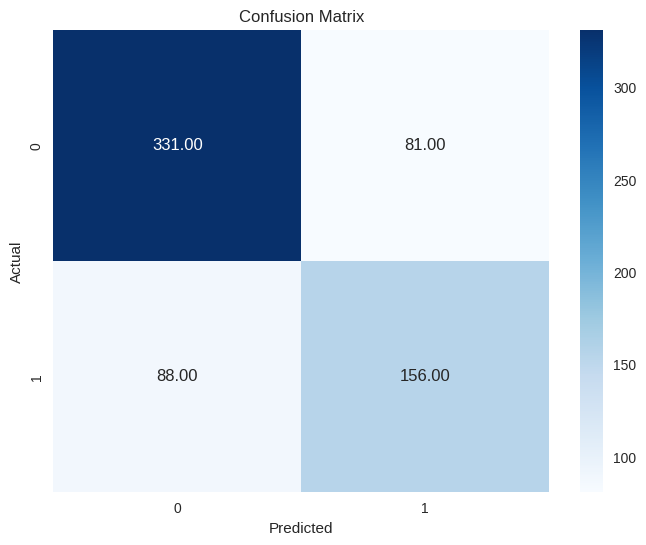

Accuracy: 0.7423780487804879
----------------------------------------------------
4	BaggingClassifier:	0.7865853658536586
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       412
           1       0.78      0.60      0.68       244

    accuracy                           0.79       656
   macro avg       0.78      0.75      0.76       656
weighted avg       0.79      0.79      0.78       656



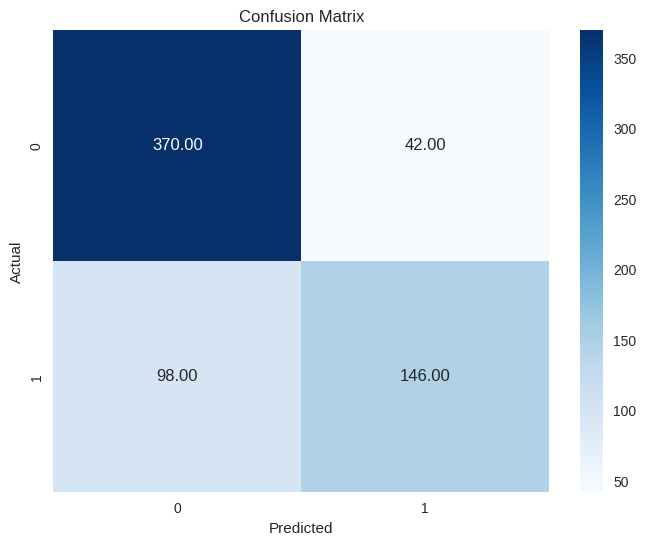

Accuracy: 0.7865853658536586
----------------------------------------------------
5	XGBClassifier:	0.7896341463414634
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       412
           1       0.75      0.65      0.70       244

    accuracy                           0.79       656
   macro avg       0.78      0.76      0.77       656
weighted avg       0.79      0.79      0.79       656



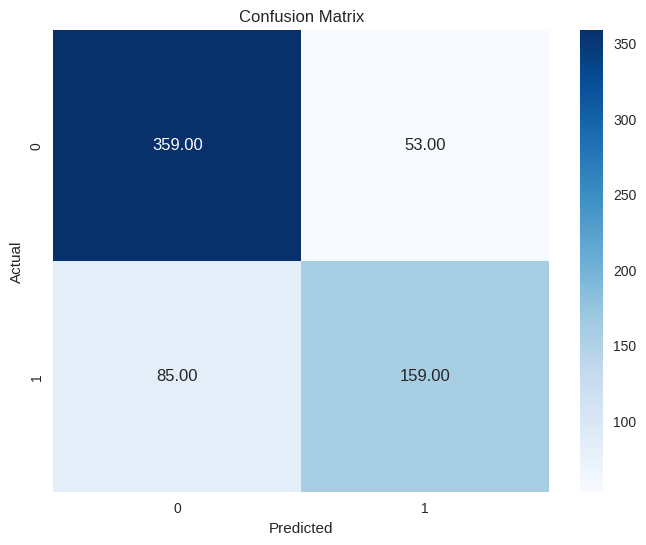

Accuracy: 0.7896341463414634
----------------------------------------------------
6	GradientBoostingClassifier:	0.7850609756097561
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       412
           1       0.78      0.59      0.67       244

    accuracy                           0.79       656
   macro avg       0.78      0.75      0.76       656
weighted avg       0.78      0.79      0.78       656



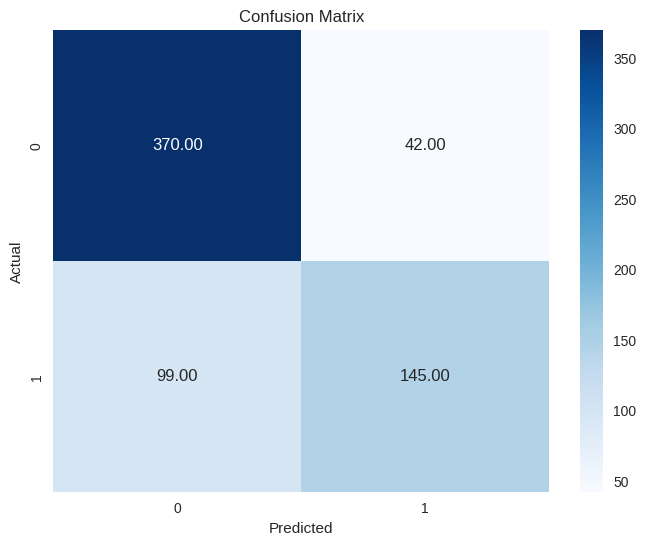

Accuracy: 0.7850609756097561
----------------------------------------------------


In [ ]:

from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = [
    ExtraTreesClassifier(random_state=42),
    KNeighborsClassifier(),
    AdaBoostClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    BaggingClassifier( random_state=42),
    XGBClassifier(seed=42),
    GradientBoostingClassifier(n_estimators=300, random_state=42)
]
# Loop through each classifier
for idx, model in enumerate(classifiers):
    # Train the classifier
    model.fit(X_train, y_train)

    # Make predictions on the test set
    pred = model.predict(X_test)

    # Print classifier name and accuracy
    print(f"{idx}\t{model.__class__.__name__}:\t{model.score(X_test, y_test)}")

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print accuracy
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)
    print("----------------------------------------------------")


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from xgboost import XGBClassifier

# Assuming you have your data in X and y

# Set a random seed for reproducibility
random_seed = 42

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# List of classifiers
classifiers = [
    ExtraTreesClassifier(random_state=random_seed),
    KNeighborsClassifier(),
    AdaBoostClassifier(random_state=random_seed),
    DecisionTreeClassifier(random_state=random_seed),
    BaggingClassifier(random_state=random_seed),
    XGBClassifier(random_state=random_seed),
    GradientBoostingClassifier(n_estimators=300, random_state=random_seed)
]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Index', 'Algorithm', 'Accuracy'])

# Loop through each classifier
for idx, model in enumerate(classifiers):
    # Train the classifier
    model.fit(X_train, y_train)

    # Make predictions on the test set
    pred = model.predict(X_test)

    # Get accuracy
    accuracy = model.score(X_test, y_test)

    # Append results to the DataFrame
    results_df = results_df.append({'Index': idx,
                                    'Algorithm': model.__class__.__name__,
                                    'Accuracy': accuracy}, ignore_index=True)

# Print the results DataFrame
print(results_df)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Create an empty list to store results
results = []

# Loop through each classifier
for idx, model in enumerate(classifiers):
    # Train the classifier
    model.fit(X_train, y_train)

    # Make predictions on the test set
    pred = model.predict(X_test)

    # Get accuracy
    accuracy = model.score(X_test, y_test)

    # Append results to the list
    results.append({'Index': idx,
                    'Algorithm': model.__class__.__name__,
                    'Accuracy': accuracy})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


   Index                   Algorithm  Accuracy
0      0        ExtraTreesClassifier  0.699695
1      1        KNeighborsClassifier  0.539634
2      2          AdaBoostClassifier  0.754573
3      3      DecisionTreeClassifier  0.742378
4      4           BaggingClassifier  0.786585
5      5               XGBClassifier  0.789634
6      6  GradientBoostingClassifier  0.785061


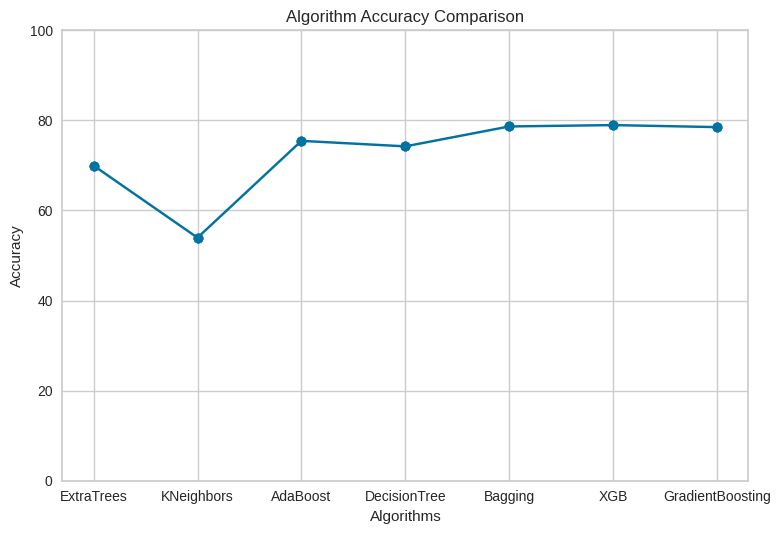

In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = [
    "ExtraTrees",
    "KNeighbors",
    "AdaBoost",
    "DecisionTree",
    "Bagging",
    "XGB",
    "GradientBoosting",
]

# Corresponding accuracy values
accuracy_values = [0.6997, 0.5396, 0.7546, 0.7424, 0.7866, 0.7896, 0.7851]

# Plotting the points
plt.scatter(classifiers, accuracy_values, label="Accuracy")

# Connecting the points with lines
plt.plot(classifiers, accuracy_values, linestyle='-', marker='o', color='b')

# Adding labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Algorithm Accuracy Comparison")  # Updated title

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Setting y-axis ticks and limits
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0', '20', '40', '60', '80', '100'])
plt.ylim(0, 1)

# Display the plot
plt.tight_layout()
plt.show()


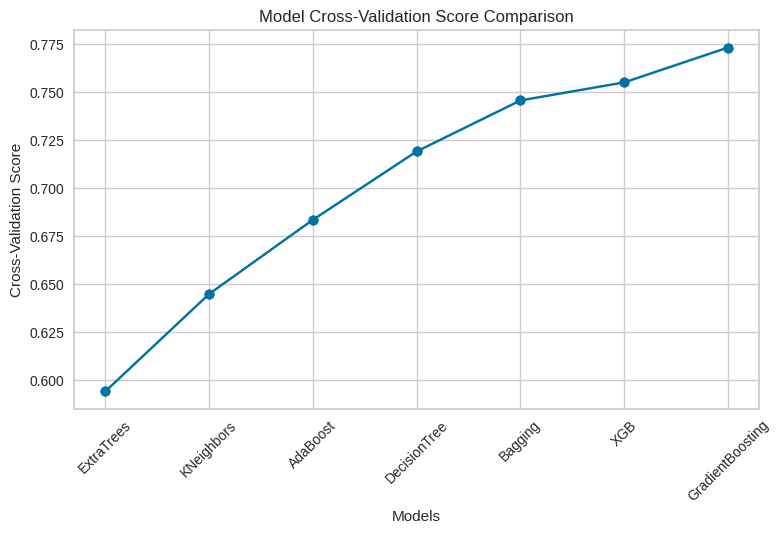

In [ ]:

import matplotlib.pyplot as plt

# Models and corresponding cross-validation scores
models = [
    "ExtraTrees",
    "KNeighbors",
    "AdaBoost",
    "DecisionTree",
    "Bagging",
    "XGB",
    "GradientBoosting",
]

cross_validation_scores = [0.594087, 0.644821, 0.683464, 0.719075, 0.745623, 0.755035, 0.773186]

# Plotting the points
plt.scatter(models, cross_validation_scores, label="Cross-Validation Score")

# Connecting the points with lines
plt.plot(models, cross_validation_scores, linestyle='-', marker='o', color='b')

# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Cross-Validation Score")
plt.title("Model Cross-Validation Score Comparison")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


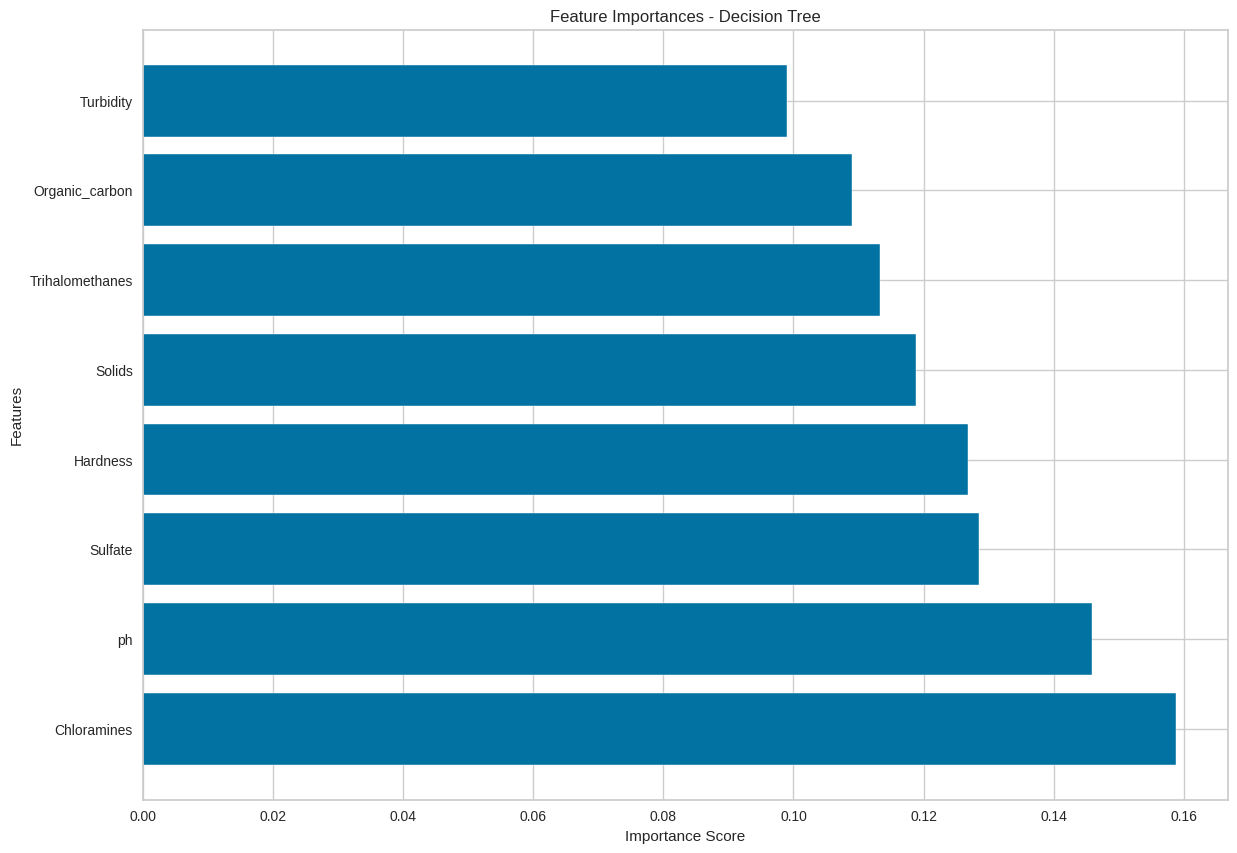

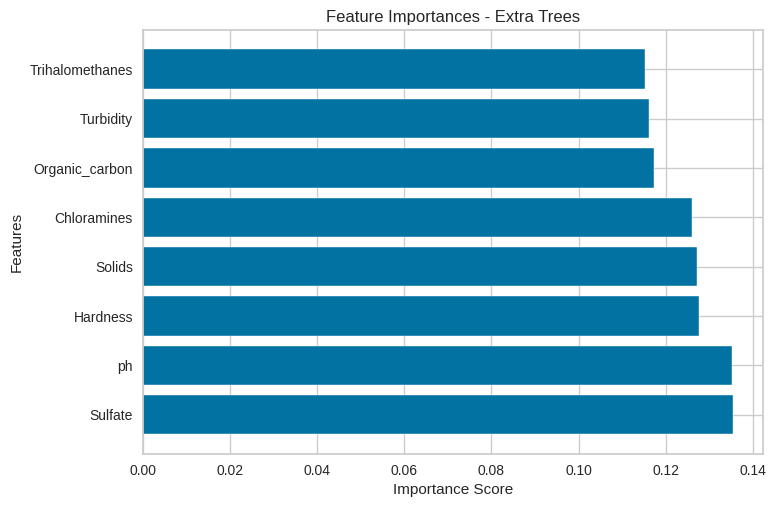

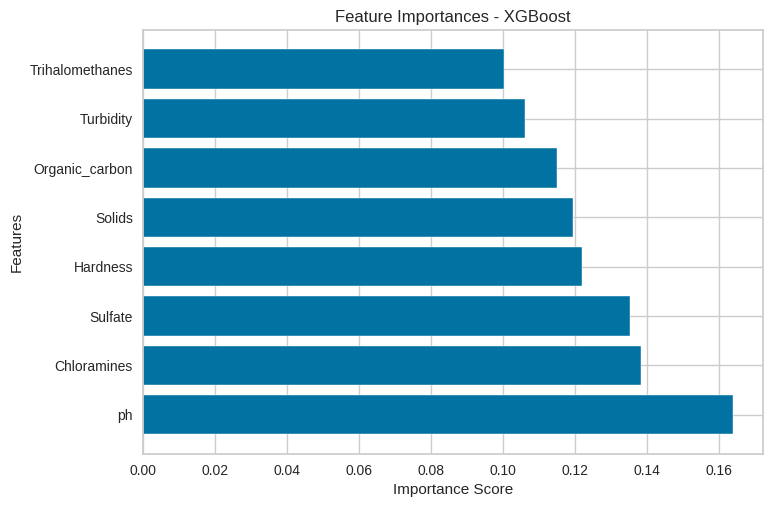

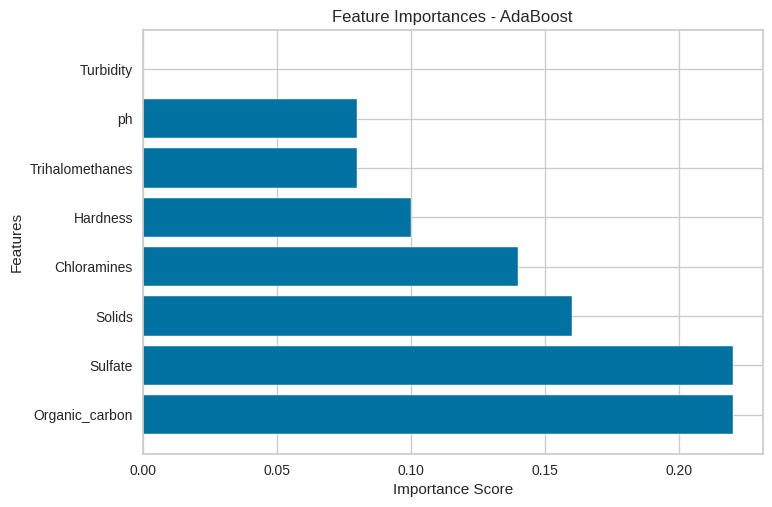

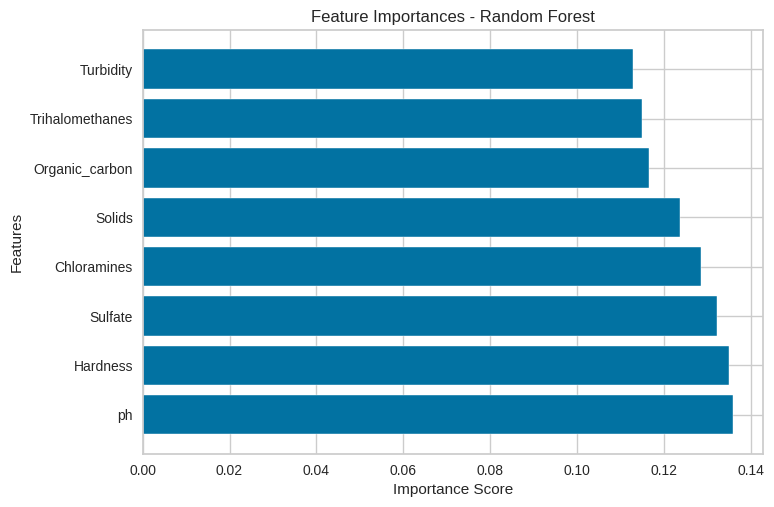

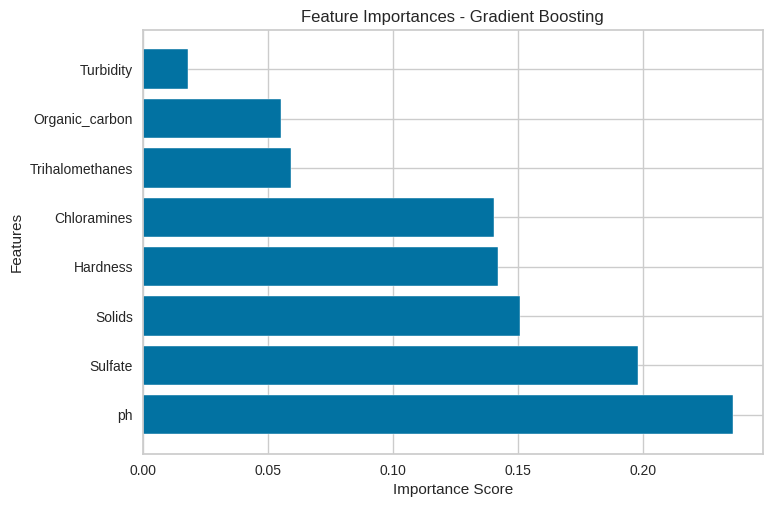

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/water_quality_ (3).csv")

# Split the dataset into features and target variable
X = data.drop(columns=["Check"])  # Features
y = data["Check"]  # Target variable

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "K Neighbors": KNeighborsClassifier()
}

# Plot feature importances for each classifier
plt.figure(figsize=(14, 10))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        importances = clf.coef_
    else:
        importances = None

    if importances is not None:
        indices = importances.argsort()[::-1]
        plt.barh(range(X.shape[1]), importances[indices], align='center')
        plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title(f'Feature Importances - {name}')
        plt.show()
